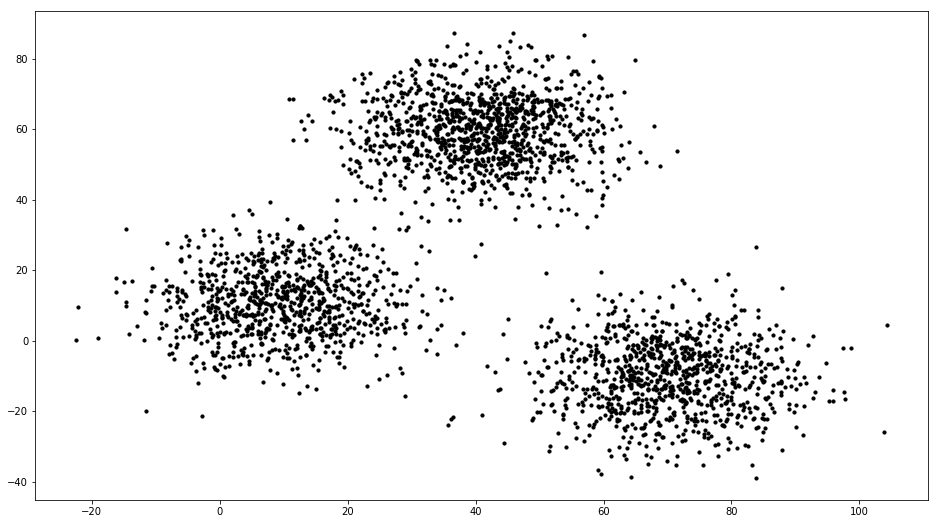

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,9)
# plt.style.use("ggplot")
df = pd.read_csv("xclara.csv")
df.head()
f1 = df['V1'].values
f2 = df['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c="black", s=10)
k = 3

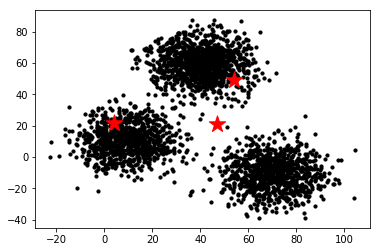

In [2]:
def dist(a,b, ax=1):
    return np.linalg.norm(a-b,axis=ax)
C_x = np.random.randint(0, max(f1)-20, size=k)
C_y = np.random.randint(0, max(f2)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float64)
C
plt.scatter(f1, f2, c="black", s=10)
plt.scatter(C_x, C_y, c="red", s=300, marker="*")

[[47. 21.]
 [ 4. 22.]
 [54. 49.]]
[[67.21503051 -8.45970532]
 [ 8.30809598 11.67407673]
 [41.06466391 60.18006216]]
[[ 69.85620873 -10.09748962]
 [  9.42542069  10.74152639]
 [ 40.70315711  59.73304659]]
[[ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]]


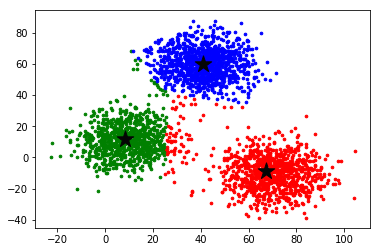

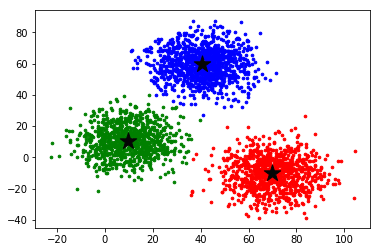

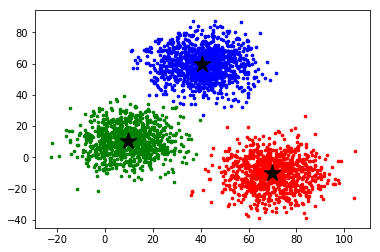

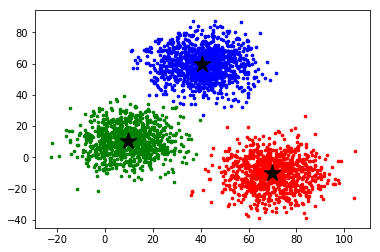

In [3]:
from copy import deepcopy
C_old = np.zeros(C.shape)
cls = np.zeros(len(X))
error = dist(C, C_old, None)
while error!=0:
    print(C)
#     input('press any key')
    for i in range(len(X)):
        d1 = dist(X[i], C)
        c1 = np.argmin(d1)
        cls[i] = c1
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if cls[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if cls[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=300, c='#050505')

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,9)
df = pd.read_csv("xclara.csv")
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(df)
cls = kmeans.predict(df)
C = kmeans.cluster_centers_
print(C)

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


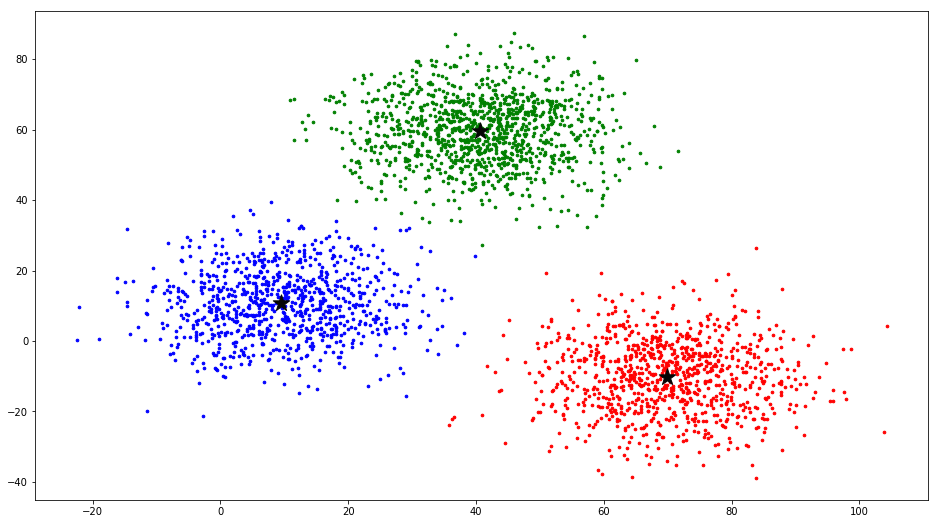

In [5]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if cls[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=300, c='#050505')

(1156, 2)
(952, 2)
(892, 2)


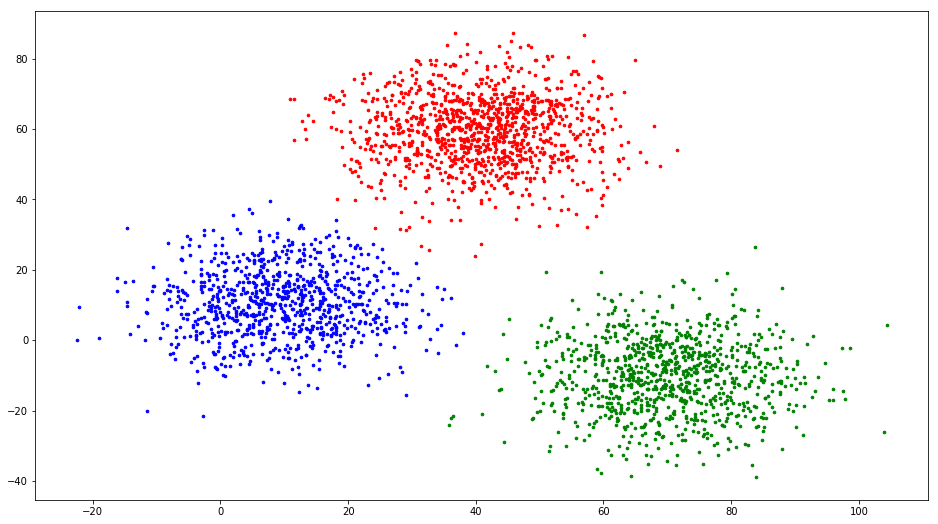

In [6]:
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(3)
kmeans = kmeans.fit(X)
labels = kmeans.labels_
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        print(points.shape)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
df = pd.DataFrame([f1, f2, labels])
df.to_csv("out.csv")